# Optimiztion with `mystic`

In [1]:
%matplotlib inline

`mystic`: approximates that `scipy.optimize` interface

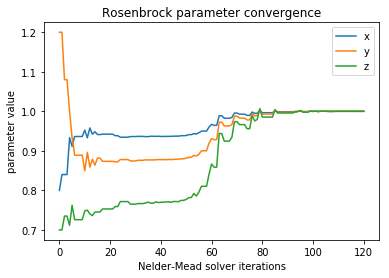

In [2]:
"""
Example:
    - Minimize Rosenbrock's Function with Nelder-Mead.
    - Plot of parameter convergence to function minimum.

Demonstrates:
    - standard models
    - minimal solver interface
    - parameter trajectories using retall
"""

# Nelder-Mead solver
from mystic.solvers import fmin

# Rosenbrock function
from mystic.models import rosen

# tools
import pylab


if __name__ == '__main__':

    # initial guess
    x0 = [0.8,1.2,0.7]

    # use Nelder-Mead to minimize the Rosenbrock function
    solution = fmin(rosen, x0, disp=0, retall=1)
    allvecs = solution[-1]

    # plot the parameter trajectories
    pylab.plot([i[0] for i in allvecs])
    pylab.plot([i[1] for i in allvecs])
    pylab.plot([i[2] for i in allvecs])

    # draw the plot
    pylab.title("Rosenbrock parameter convergence")
    pylab.xlabel("Nelder-Mead solver iterations")
    pylab.ylabel("parameter value")
    pylab.legend(["x", "y", "z"])
    pylab.show()

Diagnostic tools

* Callbacks

NOTE: while solver is running, press 'Ctrl-C' in console window
Press any key to continue and press enter

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 120
         Function evaluations: 215
[ 1.00000328  1.00000565  1.00001091]
Press any key to continue and press enter



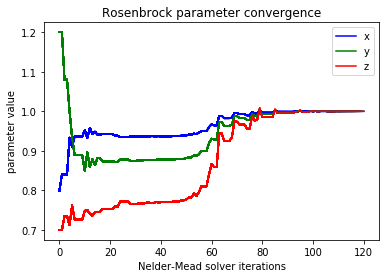

In [3]:
"""
Example:
    - Minimize Rosenbrock's Function with Nelder-Mead.
    - Dynamic plot of parameter convergence to function minimum.

Demonstrates:
    - standard models
    - minimal solver interface
    - parameter trajectories using callback
    - solver interactivity
"""

# Nelder-Mead solver
from mystic.solvers import fmin

# Rosenbrock function
from mystic.models import rosen

# tools
from mystic.tools import getch
import pylab
pylab.ion()
    
# draw the plot
def plot_frame():
    pylab.title("Rosenbrock parameter convergence")
    pylab.xlabel("Nelder-Mead solver iterations")
    pylab.ylabel("parameter value")
    pylab.draw()
    return

iter = 0
step, xval, yval, zval = [], [], [], []
# plot the parameter trajectories
def plot_params(params):
    global iter, step, xval, yval, zval
    step.append(iter)
    xval.append(params[0])
    yval.append(params[1])
    zval.append(params[2])
    pylab.plot(step,xval,'b-')
    pylab.plot(step,yval,'g-')
    pylab.plot(step,zval,'r-')
    pylab.legend(["x", "y", "z"])
    pylab.draw()
    iter += 1
    return


if __name__ == '__main__':

    # initial guess
    x0 = [0.8,1.2,0.7]

    # suggest that the user interacts with the solver
    print("NOTE: while solver is running, press 'Ctrl-C' in console window")
    getch()
    plot_frame()

    # use Nelder-Mead to minimize the Rosenbrock function
    solution = fmin(rosen, x0, disp=1, callback=plot_params, handler=True)
    print(solution)

    # don't exit until user is ready
    getch()


**NOTE** IPython does not handle shell prompt interactive programs well, so the above should be run from a command prompt.  An IPython-safe version is below.

In [4]:
""" 
Example:
    - Minimize Rosenbrock's Function with Powell's method.
    - Dynamic print of parameter convergence to function minimum.

Demonstrates:
    - standard models
    - minimal solver interface
    - parameter trajectories using callback
""" 
    
# Powell's Directonal solver
from mystic.solvers import fmin_powell
    
# Rosenbrock function
from mystic.models import rosen
    
iter = 0
# plot the parameter trajectories
def print_params(params):
    global iter
    from numpy import asarray
    print("Generation %d has best fit parameters: %s" % (iter,asarray(params)))
    iter += 1
    return
    

if __name__ == '__main__':
    
    # initial guess
    x0 = [0.8,1.2,0.7]
    print_params(x0)
    
    # use Powell's method to minimize the Rosenbrock function
    solution = fmin_powell(rosen, x0, disp=1, callback=print_params, handler=False)
    print(solution)

Generation 0 has best fit parameters: [ 0.8  1.2  0.7]
Generation 1 has best fit parameters: [ 0.8  1.2  0.7]
Generation 2 has best fit parameters: [ 1.096641    0.92316246  0.85222892]
Generation 3 has best fit parameters: [ 0.96098383  0.92341029  0.85268657]
Generation 4 has best fit parameters: [ 0.96116068  0.92362873  0.85268597]
Generation 5 has best fit parameters: [ 0.96139941  0.92394456  0.85319715]
Generation 6 has best fit parameters: [ 0.96490397  0.9293998   0.86287626]
Generation 7 has best fit parameters: [ 0.97283782  0.9438172   0.8900223 ]
Generation 8 has best fit parameters: [ 0.99282304  0.98392465  0.9676975 ]
Generation 9 has best fit parameters: [ 0.99599362  0.99123752  0.98220233]
Generation 10 has best fit parameters: [ 0.99933371  0.99875944  0.9973022 ]
Generation 11 has best fit parameters: [ 0.99959358  0.99924252  0.99835369]
Generation 12 has best fit parameters: [ 1.00000002  1.00000006  1.00000011]
Generation 13 has best fit parameters: [ 1.  1.  1.

* Monitors

In [5]:
"""
Example:
    - Minimize Rosenbrock's Function with Powell's method.

Demonstrates:
    - standard models
    - minimal solver interface
    - customized monitors
"""

# Powell's Directonal solver
from mystic.solvers import fmin_powell

# Rosenbrock function
from mystic.models import rosen

# tools
from mystic.monitors import VerboseLoggingMonitor


if __name__ == '__main__':

    print("Powell's Method")
    print("===============")

    # initial guess
    x0 = [1.5, 1.5, 0.7]

    # configure monitor
    stepmon = VerboseLoggingMonitor(1,1)

    # use Powell's method to minimize the Rosenbrock function
    solution = fmin_powell(rosen, x0, itermon=stepmon)
    print(solution)

Powell's Method
Generation 0 has Chi-Squared: 297.000000
Generation 1 has Chi-Squared: 26.522040
Generation 2 has Chi-Squared: 0.002383
Generation 3 has Chi-Squared: 0.002378
Generation 4 has Chi-Squared: 0.001940
Generation 5 has Chi-Squared: 0.001141
Generation 6 has Chi-Squared: 0.000769
Generation 7 has Chi-Squared: 0.000125
Generation 8 has Chi-Squared: 0.000042
Generation 9 has Chi-Squared: 0.000000
Generation 10 has Chi-Squared: 0.000000
Generation 11 has Chi-Squared: 0.000000
Generation 12 has Chi-Squared: 0.000000
Generation 13 has Chi-Squared: 0.000000
Generation 14 has Chi-Squared: 0.000000
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 14
         Function evaluations: 529
STOP("NormalizedChangeOverGeneration with {'tolerance': 0.0001, 'generations': 2}")
[ 1.  1.  1.]


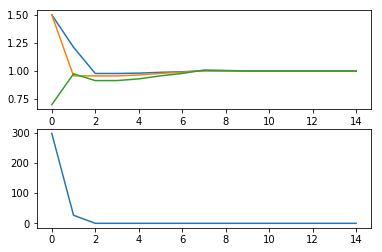

In [6]:
import mystic
mystic.log_reader('log.txt')

* Solution trajectory and model plotting

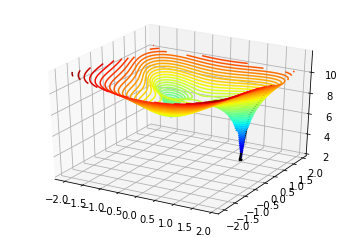

In [7]:
import mystic
mystic.model_plotter(mystic.models.rosen, 'log.txt', kwds='-d -x 1 -b "-2:2:.1, -2:2:.1, 1"')

Solver "tuning" and extension

* Solver class interface

Differential Evolution
Generation 0 has Chi-Squared: 76214.552493
Generation 50 has Chi-Squared: 5823.804953
Generation 100 has Chi-Squared: 912.555273
Generation 150 has Chi-Squared: 73.593950
Generation 200 has Chi-Squared: 10.411967
Generation 250 has Chi-Squared: 0.350054
Generation 300 has Chi-Squared: 0.010559
STOP("VTR with {'tolerance': 0.01, 'target': 0.0}")
Generation 312 has best Chi-Squared: 0.008604
       8          7         6          5         4          3         2
127.9 x - 0.3241 x - 254.6 x + 0.7937 x + 157.8 x - 0.6282 x - 30.99 x + 0.1701 x + 0.9503

Actual Coefficients:
      8       6       4      2
128 x - 256 x + 160 x - 32 x + 1



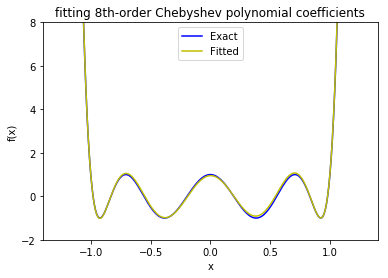

In [8]:
"""
Example:
    - Solve 8th-order Chebyshev polynomial coefficients with DE.
    - Callable plot of fitting to Chebyshev polynomial.
    - Monitor Chi-Squared for Chebyshev polynomial.

Demonstrates:
    - standard models
    - expanded solver interface
    - built-in random initial guess
    - customized monitors and termination conditions
    - customized DE mutation strategies
    - use of monitor to retrieve results information
"""

# Differential Evolution solver
from mystic.solvers import DifferentialEvolutionSolver2

# Chebyshev polynomial and cost function
from mystic.models.poly import chebyshev8, chebyshev8cost
from mystic.models.poly import chebyshev8coeffs

# tools
from mystic.termination import VTR
from mystic.strategy import Best1Exp
from mystic.monitors import VerboseMonitor
from mystic.tools import getch, random_seed
from mystic.math import poly1d
import pylab
pylab.ion()

# draw the plot
def plot_exact():
    pylab.title("fitting 8th-order Chebyshev polynomial coefficients")
    pylab.xlabel("x")
    pylab.ylabel("f(x)")
    import numpy
    x = numpy.arange(-1.2, 1.2001, 0.01)
    exact = chebyshev8(x)
    pylab.plot(x,exact,'b-')
    pylab.legend(["Exact"])
    pylab.axis([-1.4,1.4,-2,8],'k-')
    pylab.draw()
    return

# plot the polynomial
def plot_solution(params,style='y-'):
    import numpy
    x = numpy.arange(-1.2, 1.2001, 0.01)
    f = poly1d(params)
    y = f(x)
    pylab.plot(x,y,style)
    pylab.legend(["Exact","Fitted"])
    pylab.axis([-1.4,1.4,-2,8],'k-')
    pylab.draw()
    return


if __name__ == '__main__':

    print("Differential Evolution")
    print("======================")

    # set range for random initial guess
    ndim = 9
    x0 = [(-100,100)]*ndim
    random_seed(123)

    # draw frame and exact coefficients
    plot_exact()

    # configure monitor
    stepmon = VerboseMonitor(50)

    # use DE to solve 8th-order Chebyshev coefficients
    npop = 10*ndim
    solver = DifferentialEvolutionSolver2(ndim,npop)
    solver.SetRandomInitialPoints(min=[-100]*ndim, max=[100]*ndim)
    solver.SetGenerationMonitor(stepmon)
    solver.enable_signal_handler()
    solver.Solve(chebyshev8cost, termination=VTR(0.01), strategy=Best1Exp, \
                 CrossProbability=1.0, ScalingFactor=0.9, \
                 sigint_callback=plot_solution)
    solution = solver.Solution()

    # use monitor to retrieve results information
    iterations = len(stepmon)
    cost = stepmon.y[-1]
    print("Generation %d has best Chi-Squared: %f" % (iterations, cost))

    # use pretty print for polynomials
    print(poly1d(solution))

    # compare solution with actual 8th-order Chebyshev coefficients
    print("\nActual Coefficients:\n %s\n" % poly1d(chebyshev8coeffs))

    # plot solution versus exact coefficients
    plot_solution(solution)


In [9]:
from mystic.solvers import DifferentialEvolutionSolver
print("\n".join([i for i in dir(DifferentialEvolutionSolver) if not i.startswith('_')]))

Collapse
Collapsed
Finalize
SaveSolver
SetConstraints
SetEvaluationLimits
SetEvaluationMonitor
SetGenerationMonitor
SetInitialPoints
SetMultinormalInitialPoints
SetObjective
SetPenalty
SetRandomInitialPoints
SetReducer
SetSampledInitialPoints
SetSaveFrequency
SetStrictRanges
SetTermination
Solution
Solve
Step
Terminated
UpdateGenealogyRecords
bestEnergy
bestSolution
disable_signal_handler
enable_signal_handler
energy_history
evaluations
generations
solution_history


* Algorithm configurability

* Termination conditions

In [10]:
from mystic.termination import VTR, ChangeOverGeneration, And, Or
stop = Or(And(VTR(), ChangeOverGeneration()), VTR(1e-8))

from mystic.models import rosen
from mystic.monitors import VerboseMonitor
from mystic.solvers import DifferentialEvolutionSolver

solver = DifferentialEvolutionSolver(3,40)
solver.SetRandomInitialPoints([-10,-10,-10],[10,10,10])
solver.SetGenerationMonitor(VerboseMonitor(10))
solver.SetTermination(stop)
solver.SetObjective(rosen)
solver.SetStrictRanges([-10,-10,-10],[10,10,10])
solver.SetEvaluationLimits(generations=600)
solver.Solve()

print(solver.bestSolution)

Generation 0 has Chi-Squared: 587.458970
Generation 10 has Chi-Squared: 2.216492
Generation 20 has Chi-Squared: 1.626018
Generation 30 has Chi-Squared: 0.229984
Generation 40 has Chi-Squared: 0.229984
Generation 50 has Chi-Squared: 0.008647
Generation 60 has Chi-Squared: 0.000946
Generation 70 has Chi-Squared: 0.000109
Generation 80 has Chi-Squared: 0.000002
Generation 90 has Chi-Squared: 0.000000
STOP("VTR with {'tolerance': 1e-08, 'target': 0.0}")
[ 1.00001435  1.0000254   1.0000495 ]


* Solver population

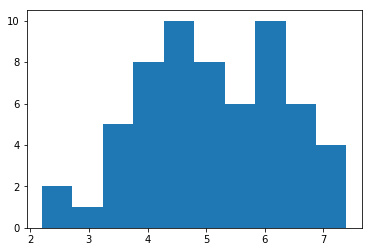

In [11]:
from mystic.solvers import DifferentialEvolutionSolver
from mystic.math import Distribution
import numpy as np
import pylab

# build a mystic distribution instance
dist = Distribution(np.random.normal, 5, 1)

# use the distribution instance as the initial population
solver = DifferentialEvolutionSolver(3,20)
solver.SetSampledInitialPoints(dist)

# visualize the initial population
pylab.hist(np.array(solver.population).ravel())
pylab.show()

**EXERCISE:** Use `mystic` to find the minimun for the `peaks` test function, with the bound specified by the `mystic.models.peaks` documentation.

**EXERCISE:** Use `mystic` to do a fit to the noisy data in the `scipy.optimize.curve_fit` example (the least squares fit).

Constraints "operators" (i.e. kernel transformations)

PENALTY: $\psi(x) = f(x) + k*p(x)$

CONSTRAINT: $\psi(x) = f(c(x)) = f(x')$

In [12]:
from mystic.constraints import *
from mystic.penalty import quadratic_equality
from mystic.coupler import inner
from mystic.math import almostEqual
from mystic.tools import random_seed
random_seed(213)

def test_penalize():

    from mystic.math.measures import mean, spread
    def mean_constraint(x, target):
        return mean(x) - target

    def range_constraint(x, target):
        return spread(x) - target

    @quadratic_equality(condition=range_constraint, kwds={'target':5.0})
    @quadratic_equality(condition=mean_constraint, kwds={'target':5.0})
    def penalty(x):
        return 0.0

    def cost(x):
        return abs(sum(x) - 5.0)

    from mystic.solvers import fmin
    from numpy import array
    x = array([1,2,3,4,5])
    y = fmin(cost, x, penalty=penalty, disp=False)

    assert round(mean(y)) == 5.0
    assert round(spread(y)) == 5.0
    assert round(cost(y)) == 4*(5.0)


def test_solve():

    from mystic.math.measures import mean
    def mean_constraint(x, target):
        return mean(x) - target

    def parameter_constraint(x):
        return x[-1] - x[0]

    @quadratic_equality(condition=mean_constraint, kwds={'target':5.0})
    @quadratic_equality(condition=parameter_constraint)
    def penalty(x):
        return 0.0

    x = solve(penalty, guess=[2,3,1])

    assert round(mean_constraint(x, 5.0)) == 0.0
    assert round(parameter_constraint(x)) == 0.0
    assert issolution(penalty, x)


def test_solve_constraint():

    from mystic.math.measures import mean
    @with_mean(1.0)
    def constraint(x):
        x[-1] = x[0]
        return x

    x = solve(constraint, guess=[2,3,1])

    assert almostEqual(mean(x), 1.0, tol=1e-15)
    assert x[-1] == x[0]
    assert issolution(constraint, x)


def test_as_constraint():

    from mystic.math.measures import mean, spread
    def mean_constraint(x, target):
        return mean(x) - target

    def range_constraint(x, target):
        return spread(x) - target

    @quadratic_equality(condition=range_constraint, kwds={'target':5.0})
    @quadratic_equality(condition=mean_constraint, kwds={'target':5.0})
    def penalty(x):
        return 0.0

    ndim = 3
    constraints = as_constraint(penalty, solver='fmin')
    #XXX: this is expensive to evaluate, as there are nested optimizations

    from numpy import arange
    x = arange(ndim)
    _x = constraints(x)

    assert round(mean(_x)) == 5.0
    assert round(spread(_x)) == 5.0
    assert round(penalty(_x)) == 0.0

    def cost(x):
        return abs(sum(x) - 5.0)

    npop = ndim*3
    from mystic.solvers import diffev
    y = diffev(cost, x, npop, constraints=constraints, disp=False, gtol=10)

    assert round(mean(y)) == 5.0
    assert round(spread(y)) == 5.0
    assert round(cost(y)) == 5.0*(ndim-1)


def test_as_penalty():

    from mystic.math.measures import mean, spread
    @with_spread(5.0)
    @with_mean(5.0)
    def constraint(x):
        return x

    penalty = as_penalty(constraint)

    from numpy import array
    x = array([1,2,3,4,5])

    def cost(x):
        return abs(sum(x) - 5.0)

    from mystic.solvers import fmin
    y = fmin(cost, x, penalty=penalty, disp=False)

    assert round(mean(y)) == 5.0
    assert round(spread(y)) == 5.0
    assert round(cost(y)) == 4*(5.0)


def test_with_penalty():

    from mystic.math.measures import mean, spread
    @with_penalty(quadratic_equality, kwds={'target':5.0})
    def penalty(x, target):
        return mean(x) - target

    def cost(x):
        return abs(sum(x) - 5.0)

    from mystic.solvers import fmin
    from numpy import array
    x = array([1,2,3,4,5])
    y = fmin(cost, x, penalty=penalty, disp=False)

    assert round(mean(y)) == 5.0
    assert round(cost(y)) == 4*(5.0)


def test_with_mean():

    from mystic.math.measures import mean, impose_mean

    @with_mean(5.0)
    def mean_of_squared(x):
        return [i**2 for i in x]

    from numpy import array
    x = array([1,2,3,4,5])
    y = impose_mean(5, [i**2 for i in x])
    assert mean(y) == 5.0
    assert mean_of_squared(x) == y


def test_with_mean_spread():

    from mystic.math.measures import mean, spread, impose_mean, impose_spread

    @with_spread(50.0)
    @with_mean(5.0)
    def constrained_squared(x):
        return [i**2 for i in x]

    from numpy import array
    x = array([1,2,3,4,5])
    y = impose_spread(50.0, impose_mean(5.0,[i**2 for i in x]))
    assert almostEqual(mean(y), 5.0, tol=1e-15)
    assert almostEqual(spread(y), 50.0, tol=1e-15)
    assert constrained_squared(x) == y


def test_constrained_solve():

    from mystic.math.measures import mean, spread
    @with_spread(5.0)
    @with_mean(5.0)
    def constraints(x):
        return x

    def cost(x):
        return abs(sum(x) - 5.0)

    from mystic.solvers import fmin_powell
    from numpy import array
    x = array([1,2,3,4,5])
    y = fmin_powell(cost, x, constraints=constraints, disp=False)

    assert almostEqual(mean(y), 5.0, tol=1e-15)
    assert almostEqual(spread(y), 5.0, tol=1e-15)
    assert almostEqual(cost(y), 4*(5.0), tol=1e-6)


if __name__ == '__main__':
    test_penalize()
    test_solve()
    test_solve_constraint()
    test_as_constraint()
    test_as_penalty()
    test_with_penalty()
    test_with_mean()
    test_with_mean_spread()
    test_constrained_solve()

In [13]:
from mystic.coupler import and_, or_, not_
from mystic.constraints import and_ as _and, or_ as _or, not_ as _not


if __name__ == '__main__':
    import numpy as np
    from mystic.penalty import linear_equality, quadratic_equality
    from mystic.constraints import as_constraint

    x = x1,x2,x3 = (5., 5., 1.)
    f = f1,f2,f3 = (np.sum, np.prod, np.average)

    k = 100
    solver = 'fmin_powell' #'diffev'
    ptype = quadratic_equality


    # case #1: couple penalties into a single constraint

    p1 = lambda x: abs(x1 - f1(x))
    p2 = lambda x: abs(x2 - f2(x))
    p3 = lambda x: abs(x3 - f3(x))
    p = (p1,p2,p3)
    p = [ptype(pi)(lambda x:0.) for pi in p]
    penalty = and_(*p, k=k)
    constraint = as_constraint(penalty, solver=solver)

    x = [1,2,3,4,5]
    x_ = constraint(x)

    assert round(f1(x_)) == round(x1)
    assert round(f2(x_)) == round(x2)
    assert round(f3(x_)) == round(x3)


   # case #2: couple constraints into a single constraint

    from mystic.math.measures import impose_product, impose_sum, impose_mean
    from mystic.constraints import as_penalty
    from mystic import random_seed
    random_seed(123)

    t = t1,t2,t3 = (impose_sum, impose_product, impose_mean)
    c1 = lambda x: t1(x1, x)
    c2 = lambda x: t2(x2, x)
    c3 = lambda x: t3(x3, x)
    c = (c1,c2,c3)

    k=1
    solver = 'buckshot' #'diffev'
    ptype = linear_equality #quadratic_equality

    p = [as_penalty(ci, ptype) for ci in c]
    penalty = and_(*p, k=k)
    constraint = as_constraint(penalty, solver=solver)

    x = [1,2,3,4,5]
    x_ = constraint(x)

    assert round(f1(x_)) == round(x1)
    assert round(f2(x_)) == round(x2)
    assert round(f3(x_)) == round(x3)


    # etc: more coupling of constraints
    from mystic.constraints import with_mean, discrete

    @with_mean(5.0)
    def meanie(x):
      return x

    @discrete(list(range(11)))
    def integers(x):
      return x

    c = _and(integers, meanie)
    x = c([1,2,3])
    assert x == integers(x) == meanie(x)
    x = c([9,2,3])
    assert x == integers(x) == meanie(x)
    x = c([0,-2,3])
    assert x == integers(x) == meanie(x)
    x = c([9,-200,344])
    assert x == integers(x) == meanie(x)

    c = _or(meanie, integers)
    x = c([1.1234, 4.23412, -9])
    assert x == meanie(x) and x != integers(x)
    x = c([7.0, 10.0, 0.0])
    assert x == integers(x) and x != meanie(x)
    x = c([6.0, 9.0, 0.0])
    assert x == integers(x) == meanie(x)
    x = c([3,4,5])
    assert x == integers(x) and x != meanie(x)
    x = c([3,4,5.5])
    assert x == meanie(x) and x != integers(x)

    c = _not(integers)
    x = c([1,2,3])
    assert x != integers(x) and x != [1,2,3] and x == c(x)
    x = c([1.1,2,3])
    assert x != integers(x) and x == [1.1,2,3] and x == c(x)
    c = _not(meanie)
    x = c([1,2,3])
    assert x != meanie(x) and x == [1,2,3] and x == c(x)
    x = c([4,5,6])
    assert x != meanie(x) and x != [4,5,6] and x == c(x)
    c = _not(_and(meanie, integers))
    x = c([4,5,6])
    assert x != meanie(x) and x != integers(x) and x != [4,5,6] and x == c(x)


    # etc: more coupling of penalties
    from mystic.penalty import quadratic_inequality

    p1 = lambda x: sum(x) - 5
    p2 = lambda x: min(i**2 for i in x)
    p = p1,p2

    p = [quadratic_inequality(pi)(lambda x:0.) for pi in p]
    p1,p2 = p
    penalty = and_(*p)

    x = [[1,2],[-2,-1],[5,-5]]
    for xi in x:
        assert p1(xi) + p2(xi) == penalty(xi)

    penalty = or_(*p)
    for xi in x:
        assert min(p1(xi),p2(xi)) == penalty(xi)

    penalty = not_(p1)
    for xi in x:
        assert bool(p1(xi)) != bool(penalty(xi))
    penalty = not_(p2)
    for xi in x:
        assert bool(p2(xi)) != bool(penalty(xi))


In addition to being able to generically apply information as a penalty, `mystic` provides the ability to construct constraints "operators" -- essentially applying kernel transformations that reduce optimizer search space to the space of solutions that satisfy the constraints.  This can greatly accelerate convergence to a solution, as the space that the optimizer can explore is restricted.

In [14]:
"""
Example:
    - Minimize Rosenbrock's Function with Powell's method.

Demonstrates:
    - standard models
    - minimal solver interface
    - parameter constraints solver and constraints factory decorator
    - statistical parameter constraints
    - customized monitors
"""

# Powell's Directonal solver
from mystic.solvers import fmin_powell

# Rosenbrock function
from mystic.models import rosen

# tools
from mystic.monitors import VerboseMonitor
from mystic.math.measures import mean, impose_mean


if __name__ == '__main__':

    print("Powell's Method")
    print("===============")

    # initial guess
    x0 = [0.8,1.2,0.7]

    # use the mean constraints factory decorator
    from mystic.constraints import with_mean

    # define constraints function
    @with_mean(1.0)
    def constraints(x):
        # constrain the last x_i to be the same value as the first x_i
        x[-1] = x[0]
        return x

    # configure monitor
    stepmon = VerboseMonitor(1)

    # use Powell's method to minimize the Rosenbrock function
    solution = fmin_powell(rosen, x0, constraints=constraints, itermon=stepmon)
    print(solution)


Powell's Method
Generation 0 has Chi-Squared: 81.100247
Generation 1 has Chi-Squared: 0.000000
Generation 2 has Chi-Squared: 0.000000
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 81
STOP("NormalizedChangeOverGeneration with {'tolerance': 0.0001, 'generations': 2}")
[ 1.  1.  1.]


* Range (i.e. 'box') constraints

Use `solver.SetStrictRange`, or the `bounds` keyword on the solver function interface.

* Symbolic constraints interface

In [15]:
%%file spring.py
"a Tension-Compression String"

def objective(x):
    x0,x1,x2 = x
    return x0**2 * x1 * (x2 + 2)

bounds = [(0,100)]*3
# with penalty='penalty' applied, solution is:
xs = [0.05168906, 0.35671773, 11.28896619]
ys = 0.01266523

from mystic.symbolic import generate_constraint, generate_solvers, solve
from mystic.symbolic import generate_penalty, generate_conditions

equations = """
1.0 - (x1**3 * x2)/(71785*x0**4) <= 0.0
(4*x1**2 - x0*x1)/(12566*x0**3 * (x1 - x0)) + 1./(5108*x0**2) - 1.0 <= 0.0
1.0 - 140.45*x0/(x2 * x1**2) <= 0.0
(x0 + x1)/1.5 - 1.0 <= 0.0
"""

pf = generate_penalty(generate_conditions(equations), k=1e12)


if __name__ == '__main__':

    from mystic.solvers import diffev2

    result = diffev2(objective, x0=bounds, bounds=bounds, penalty=pf, npop=40,
                     gtol=500, disp=True, full_output=True)

    print(result[0])

Writing spring.py


In [16]:
equations = """
1.0 - (x1**3 * x2)/(71785*x0**4) <= 0.0
(4*x1**2 - x0*x1)/(12566*x0**3 * (x1 - x0)) + 1./(5108*x0**2) - 1.0 <= 0.0
1.0 - 140.45*x0/(x2 * x1**2) <= 0.0
(x0 + x1)/1.5 - 1.0 <= 0.0
"""

from mystic.symbolic import generate_constraint, generate_solvers, solve
from mystic.symbolic import generate_penalty, generate_conditions

ineql, eql = generate_conditions(equations)

print("CONVERTED SYMBOLIC TO SINGLE CONSTRAINTS FUNCTIONS")
print(ineql)
print(eql)

print("\nTHE INDIVIDUAL INEQUALITIES")
for f in ineql:
    print(f.__doc__)

print("\nGENERATED THE PENALTY FUNCTION FOR ALL CONSTRAINTS")
pf = generate_penalty((ineql, eql))
print(pf.__doc__)

x = [-0.1, 0.5, 11.0]
print("\nPENALTY FOR {}: {}".format(x, pf(x)))

CONVERTED SYMBOLIC TO SINGLE CONSTRAINTS FUNCTIONS
(<function inequality_4606002448 at 0x111d18488>, <function inequality_4604414640 at 0x111d181e0>, <function inequality_4606003984 at 0x112733b70>, <function inequality_4605118704 at 0x1127331e0>)
()

THE INDIVIDUAL INEQUALITIES
1.0 - (x[1]**3 * x[2])/(71785*x[0]**4) - (0.0)
(4*x[1]**2 - x[0]*x[1])/(12566*x[0]**3 * (x[1] - x[0])) + 1./(5108*x[0]**2) - 1.0 - (0.0)
1.0 - 140.45*x[0]/(x[2] * x[1]**2) - (0.0)
(x[0] + x[1])/1.5 - 1.0 - (0.0)

GENERATED THE PENALTY FUNCTION FOR ALL CONSTRAINTS
quadratic_inequality: 1.0 - (x[1]**3 * x[2])/(71785*x[0]**4) - (0.0)
quadratic_inequality: (4*x[1]**2 - x[0]*x[1])/(12566*x[0]**3 * (x[1] - x[0])) + 1./(5108*x[0]**2) - 1.0 - (0.0)
quadratic_inequality: 1.0 - 140.45*x[0]/(x[2] * x[1]**2) - (0.0)
quadratic_inequality: (x[0] + x[1])/1.5 - 1.0 - (0.0)

PENALTY FOR [-0.1, 0.5, 11.0]: 7590.476190957014


* Penatly functions

In [17]:
equations = """
1.0 - (x1**3 * x2)/(71785*x0**4) <= 0.0
(4*x1**2 - x0*x1)/(12566*x0**3 * (x1 - x0)) + 1./(5108*x0**2) - 1.0 <= 0.0
1.0 - 140.45*x0/(x2 * x1**2) <= 0.0
(x0 + x1)/1.5 - 1.0 <= 0.0
"""

In [18]:
"a Tension-Compression String"

from spring import objective, bounds, xs, ys

from mystic.penalty import quadratic_inequality

def penalty1(x): # <= 0.0
    return 1.0 - (x[1]**3 * x[2])/(71785*x[0]**4)

def penalty2(x): # <= 0.0
    return (4*x[1]**2 - x[0]*x[1])/(12566*x[0]**3 * (x[1] - x[0])) + 1./(5108*x[0]**2) - 1.0

def penalty3(x): # <= 0.0
    return 1.0 - 140.45*x[0]/(x[2] * x[1]**2)

def penalty4(x): # <= 0.0
    return (x[0] + x[1])/1.5 - 1.0

@quadratic_inequality(penalty1, k=1e12)
@quadratic_inequality(penalty2, k=1e12)
@quadratic_inequality(penalty3, k=1e12)
@quadratic_inequality(penalty4, k=1e12)
def penalty(x):
    return 0.0



if __name__ == '__main__':

    from mystic.solvers import diffev2

    result = diffev2(objective, x0=bounds, bounds=bounds, penalty=penalty, npop=40,
                     gtol=500, disp=True, full_output=True)
    print(result[0])

Optimization terminated successfully.
         Current function value: 0.012665
         Iterations: 540
         Function evaluations: 21640
[  0.05168906   0.35671772  11.28896693]


* "Operators" that directly constrain search space

In [19]:
"""

  Crypto problem in Google CP Solver.

  Prolog benchmark problem
  '''
  Name           : crypto.pl
  Original Source: P. Van Hentenryck's book
  Adapted by     : Daniel Diaz - INRIA France
  Date           : September 1992
  '''
"""

def objective(x):
    return 0.0

nletters = 26

bounds = [(1,nletters)]*nletters
# with penalty='penalty' applied, solution is:
#      A   B   C   D   E   F   G   H   I   J   K   L   M   N   O   P   Q
xs = [ 5, 13,  9, 16, 20,  4, 24, 21, 25, 17, 23,  2,  8, 12, 10, 19,  7, \
#      R   S   T   U   V   W   X   Y   Z
      11, 15,  3,  1, 26,  6, 22, 14, 18]
ys = 0.0

# constraints
equations = """
B + A + L + L + E + T - 45 == 0
C + E + L + L + O - 43 == 0
C + O + N + C + E + R + T - 74 == 0
F + L + U + T + E - 30 == 0
F + U + G + U + E - 50 == 0
G + L + E + E - 66 == 0
J + A + Z + Z - 58 == 0
L + Y + R + E - 47 == 0
O + B + O + E - 53 == 0
O + P + E + R + A - 65 == 0
P + O + L + K + A - 59 == 0
Q + U + A + R + T + E + T - 50 == 0
S + A + X + O + P + H + O + N + E - 134 == 0
S + C + A + L + E - 51 == 0
S + O + L + O - 37 == 0
S + O + N + G - 61 == 0
S + O + P + R + A + N + O - 82 == 0
T + H + E + M + E - 72 == 0
V + I + O + L + I + N - 100 == 0
W + A + L + T + Z - 34 == 0
"""
var = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')

# Let's say we know the vowels.
bounds[0] = (5,5)    # A
bounds[4] = (20,20)  # E
bounds[8] = (25,25)  # I
bounds[14] = (10,10) # O
bounds[20] = (1,1)   # U

from mystic.constraints import unique, near_integers, has_unique
from mystic.symbolic import generate_penalty, generate_conditions
pf = generate_penalty(generate_conditions(equations,var),k=1)
from mystic.penalty import quadratic_equality

@quadratic_equality(near_integers)
@quadratic_equality(has_unique)
def penalty(x):
    return pf(x)

from numpy import round, hstack, clip
def constraint(x):
    x = round(x).astype(int) # force round and convert type to int
    x = clip(x, 1,nletters)  #XXX: hack to impose bounds
    x = unique(x, range(1,nletters+1))
    return x


if __name__ == '__main__':

    from mystic.solvers import diffev2
    from mystic.monitors import Monitor, VerboseMonitor
    mon = VerboseMonitor(50)

    result = diffev2(objective, x0=bounds, bounds=bounds, penalty=pf,
                     constraints=constraint, npop=52, ftol=1e-8, gtol=1000,
                     disp=True, full_output=True, cross=0.1, scale=0.9, itermon=mon)
    print(result[0])


Generation 0 has Chi-Squared: 1495.000000
Generation 50 has Chi-Squared: 469.000000
Generation 100 has Chi-Squared: 270.000000
Generation 150 has Chi-Squared: 142.000000
Generation 200 has Chi-Squared: 124.000000
Generation 250 has Chi-Squared: 106.000000
Generation 300 has Chi-Squared: 74.000000
Generation 350 has Chi-Squared: 61.000000
Generation 400 has Chi-Squared: 38.000000
Generation 450 has Chi-Squared: 32.000000
Generation 500 has Chi-Squared: 24.000000
Generation 550 has Chi-Squared: 24.000000
Generation 600 has Chi-Squared: 23.000000
Generation 650 has Chi-Squared: 23.000000
Generation 700 has Chi-Squared: 21.000000
Generation 750 has Chi-Squared: 21.000000
Generation 800 has Chi-Squared: 17.000000
Generation 850 has Chi-Squared: 13.000000
Generation 900 has Chi-Squared: 6.000000
Generation 950 has Chi-Squared: 6.000000
Generation 1000 has Chi-Squared: 6.000000
Generation 1050 has Chi-Squared: 6.000000
Generation 1100 has Chi-Squared: 6.000000
Generation 1150 has Chi-Squared:

Special cases

* Integer and mixed integer programming

In [20]:
"""
  Eq 10 in Google CP Solver.

  Standard benchmark problem.
"""

def objective(x):
    return 0.0

bounds = [(0,10)]*7
# with penalty='penalty' applied, solution is:
xs = [6., 0., 8., 4., 9., 3., 9.]
ys = 0.0

# constraints
equations = """
98527*x0 + 34588*x1 + 5872*x2 + 59422*x4 + 65159*x6 - 1547604 - 30704*x3 - 29649*x5 == 0.0
98957*x1 + 83634*x2 + 69966*x3 + 62038*x4 + 37164*x5 + 85413*x6 - 1823553 - 93989*x0 == 0.0
900032 + 10949*x0 + 77761*x1 + 67052*x4 - 80197*x2 - 61944*x3 - 92964*x5 - 44550*x6 == 0.0
73947*x0 + 84391*x2 + 81310*x4 - 1164380 - 96253*x1 - 44247*x3 - 70582*x5 - 33054*x6 == 0.0
13057*x2 + 42253*x3 + 77527*x4 + 96552*x6 - 1185471 - 60152*x0 - 21103*x1 - 97932*x5 == 0.0
1394152 + 66920*x0 + 55679*x3 - 64234*x1 - 65337*x2 - 45581*x4 - 67707*x5 - 98038*x6 == 0.0
68550*x0 + 27886*x1 + 31716*x2 + 73597*x3 + 38835*x6 - 279091 - 88963*x4 - 76391*x5 == 0.0
76132*x1 + 71860*x2 + 22770*x3 + 68211*x4 + 78587*x5 - 480923 - 48224*x0 - 82817*x6 == 0.0
519878 + 94198*x1 + 87234*x2 + 37498*x3 - 71583*x0 - 25728*x4 - 25495*x5 - 70023*x6 == 0.0
361921 + 78693*x0 + 38592*x4 + 38478*x5 - 94129*x1 - 43188*x2 - 82528*x3 - 69025*x6 == 0.0
"""

from mystic.symbolic import generate_constraint, generate_solvers, solve
cf = generate_constraint(generate_solvers(solve(equations)))


if __name__ == '__main__':

    from mystic.solvers import diffev2

    result = diffev2(objective, x0=bounds, bounds=bounds, constraints=cf,
                     npop=4, gtol=1, disp=True, full_output=True)

    print(result[0])

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 14
[ 6.  0.  8.  4.  9.  3.  9.]


**EXERCISE:** Solve the `chebyshev8.cost` example exactly, by applying the knowledge that the last term in the chebyshev polynomial will always be be one. Use `numpy.round` or `mystic.constraints.integers` or to constrain solutions to the set of integers.  Does using `mystic.suppressed` to supress small numbers accelerate the solution?

**EXERCISE:** Replace the symbolic constraints in the following "Pressure Vessel Design" code with explicit penalty functions (i.e. use a compound penalty built with `mystic.penalty.quadratic_inequality`).

In [21]:
"Pressure Vessel Design"

def objective(x):
    x0,x1,x2,x3 = x
    return 0.6224*x0*x2*x3 + 1.7781*x1*x2**2 + 3.1661*x0**2*x3 + 19.84*x0**2*x2

bounds = [(0,1e6)]*4
# with penalty='penalty' applied, solution is:
xs = [0.72759093, 0.35964857, 37.69901188, 240.0]
ys = 5804.3762083

from mystic.symbolic import generate_constraint, generate_solvers, solve
from mystic.symbolic import generate_penalty, generate_conditions

equations = """
-x0 + 0.0193*x2 <= 0.0
-x1 + 0.00954*x2 <= 0.0
-pi*x2**2*x3 - (4/3.)*pi*x2**3 + 1296000.0 <= 0.0
x3 - 240.0 <= 0.0
"""
pf = generate_penalty(generate_conditions(equations), k=1e12)


if __name__ == '__main__':

    from mystic.solvers import diffev2
    from mystic.math import almostEqual

    result = diffev2(objective, x0=bounds, bounds=bounds, penalty=pf, npop=40, gtol=500,
                     disp=True, full_output=True)
    print(result[0])


Optimization terminated successfully.
         Current function value: 5804.376208
         Iterations: 950
         Function evaluations: 38040
[   0.72759093    0.35964857   37.69901188  240.        ]


* Linear and quadratic constraints

In [22]:
"""
    Minimize: f = 2*x[0] + 1*x[1]

    Subject to:  -1*x[0] + 1*x[1] <= 1
                  1*x[0] + 1*x[1] >= 2
                           1*x[1] >= 0
                  1*x[0] - 2*x[1] <= 4

    where:  -inf <= x[0] <= inf
"""

def objective(x):
    x0,x1 = x
    return 2*x0 + x1

equations = """
-x0 + x1 - 1.0 <= 0.0
-x0 - x1 + 2.0 <= 0.0
x0 - 2*x1 - 4.0 <= 0.0
"""
bounds = [(None, None),(0.0, None)]

# with penalty='penalty' applied, solution is:
xs = [0.5, 1.5]
ys = 2.5

from mystic.symbolic import generate_conditions, generate_penalty
pf = generate_penalty(generate_conditions(equations), k=1e3)
from mystic.symbolic import generate_constraint, generate_solvers, simplify
cf = generate_constraint(generate_solvers(simplify(equations)))


if __name__ == '__main__':

    from mystic.solvers import fmin_powell
    from mystic.math import almostEqual

    result = fmin_powell(objective, x0=[0.0,0.0], bounds=bounds, constraint=cf,
                         penalty=pf, disp=True, full_output=True, gtol=3)
    print(result[0])

Optimization terminated successfully.
         Current function value: 2.499688
         Iterations: 6
         Function evaluations: 277
[ 0.49974959  1.49987526]


**EXERCISE:** Solve the `cvxopt` "qp" example with `mystic`.  Use symbolic constaints, penalty functions, or constraints operators.  If you get it quickly, do all three methods.

Let's look at how `mystic` gives improved [solver workflow](workflow.ipynb)